In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})

STATUS

In [133]:
df = pd.read_csv('../output/datastatus.csv', parse_dates=['timestamp'])

In [134]:
usernamelist = df["username"].unique()
usernamelist = list(usernamelist)
usernamelist.remove("test-bot-1")
usernamelist.remove("test-bot-2")
usernamelist.remove("Groovy")

In [137]:
df["datetime"] = pd.to_datetime(df['timestamp'])
df["hour"] = df["datetime"].apply(lambda x: x.hour)
df["minute"] = df["datetime"].apply(lambda x: x.minute)
df["day"] = df["datetime"].apply(lambda x: x.weekday)

In [138]:
df.loc[df["status"] == "online", "status-code"] = 1
df.loc[df["status"] == "offline", "status-code"] = 0
df.loc[df["status"] == "idle", "status-code"] = 0
df.loc[df["status"] == "dnd", "status-code"] = 0

In [139]:
df = df.loc[~ df["username"].isin(["Groovy", "test-bot-1", "test-bot-2"])]

In [140]:
times = np.zeros((7, 24))

In [141]:
i = 0
for idx, row in df.iterrows():
    times[row["day"], row["hour"]] += row["status-code"] 
    i += 1
times = times/i

In [142]:
status = np.empty((7, 1440, len(usernamelist)), dtype=object)

In [143]:
dfonline = df.loc[df["status"].isin(["online", "dnd"])]

In [144]:
for idx, row in dfonline.iterrows():
    if row["username"] in usernamelist:
        status[row["day"], (row["hour"] * 60) + row["minute"], usernamelist.index(row["username"])] = 1

<AxesSubplot:>

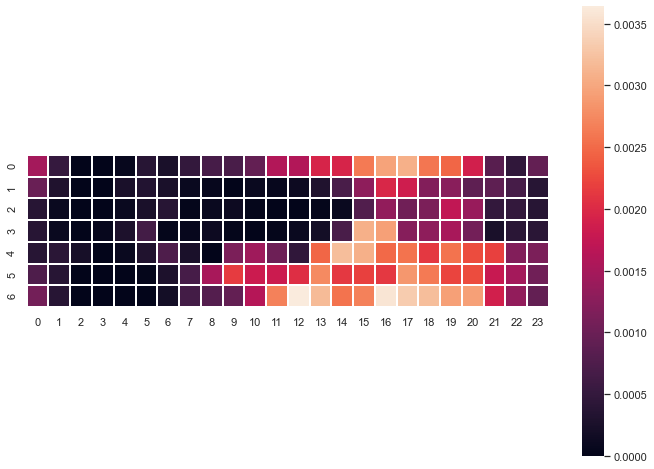

In [145]:
sns.heatmap(times, linewidth=1, linecolor='w', square=True)

MESSAGES

In [146]:
df = pd.read_csv('../output/datacontent.csv', parse_dates=['timestamp'])

In [147]:
df["datetime"] = pd.to_datetime(df['timestamp'])
df["hour"] = df["datetime"].apply(lambda x: x.hour)
df["minute"] = df["datetime"].apply(lambda x: x.minute)
df["day"] = df["datetime"].apply(lambda x: x.weekday)

In [148]:
df = df.loc[~ df["username"].isin(["Groovy", "test-bot-1", "test-bot-2"])]

In [149]:
times = np.zeros((7, 24))

In [150]:
i = 0
for idx, row in df.iterrows():
    times[row["day"], row["hour"]] += row["length"]
    i += 1
times = times/i

In [151]:
messages = np.empty((7, 1440, len(usernamelist)), dtype=object)
messages.fill([])

In [152]:
for idx, row in df.iterrows():
    messages[row["day"], (row["hour"] * 60) + row["minute"], usernamelist.index(row["username"][:len(row["username"])-5])] = 1

<AxesSubplot:>

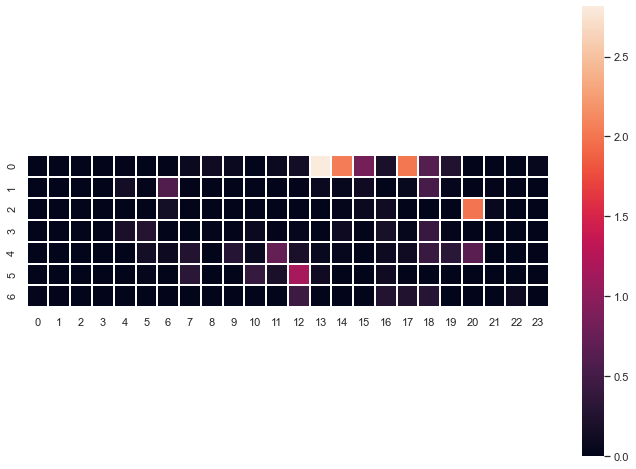

In [153]:
sns.heatmap(times, linewidth=1, linecolor='w', square=True)

VOICE

In [154]:
df = pd.read_csv('../output/dataevent.csv', parse_dates=['timestamp'])

In [155]:
df = df.loc[~ df["username"].isin(["Groovy", "test-bot-1", "test-bot-2"])]

In [156]:
df["datetime"] = pd.to_datetime(df['timestamp'])
df["hour"] = df["datetime"].apply(lambda x: x.hour)
df["minute"] = df["datetime"].apply(lambda x: x.minute)
df["day"] = df["datetime"].apply(lambda x: x.weekday)

In [157]:
times = np.zeros((7, 24))

In [158]:
i = 0
for idx, row in df.iterrows():
    if row["event"] == "join":
        times[row["day"], row["hour"]] += 1
        i += 1
times = times/i

In [159]:
voice = np.empty((7, 1440, len(usernamelist)), dtype=object)
voice.fill([])

In [160]:
for idx, row in df.iterrows():
    if row["event"] == "join":
        voice[row["day"], (row["hour"] * 60) + row["minute"], usernamelist.index(row["username"][:len(row["username"])-5])] = 1

<AxesSubplot:>

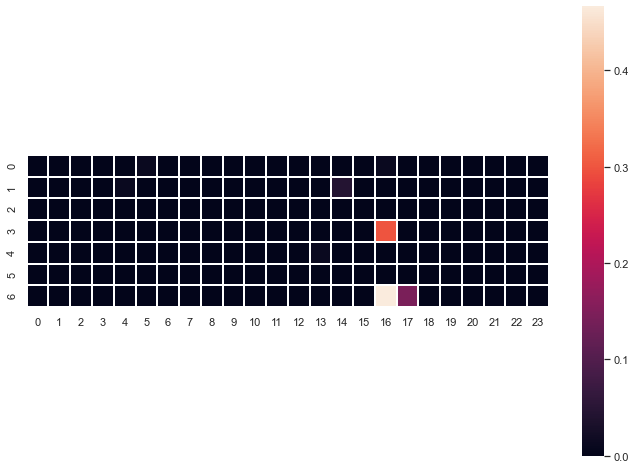

In [161]:
sns.heatmap(times, linewidth=1, linecolor='w', square=True)

GAMES

In [162]:
df = pd.read_csv('../output/datagame.csv', parse_dates=['timestamp'])

In [163]:
df["datetime"] = pd.to_datetime(df['timestamp'])
df["hour"] = df["datetime"].apply(lambda x: x.hour)
df["minute"] = df["datetime"].apply(lambda x: x.minute)
df["day"] = df["datetime"].apply(lambda x: x.weekday)

In [164]:
df = df.loc[~ df["username"].isin(["Groovy", "test-bot-1", "test-bot-2"])]

In [165]:
times = np.zeros((7, 24))
i = 0
for idx, row in df.iterrows():
    times[row["day"], row["hour"]] += 1
    i += 1
times = times/i

In [166]:
games = np.empty((7, 1440, len(usernamelist)), dtype=object)
games.fill([])

In [167]:
for idx, row in df.iterrows():
    games[row["day"], (row["hour"] * 60) + row["minute"], usernamelist.index(row["username"])] = 1

<AxesSubplot:>

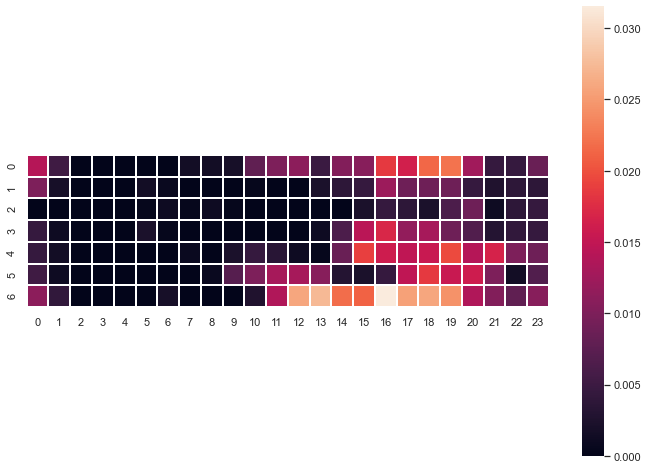

In [168]:
sns.heatmap(times, linewidth=1, linecolor='w', square=True)

CREATING LINKS

In [169]:
from pyvis.network import Network
import itertools

In [170]:
df = pd.read_csv('../output/datastatus.csv', parse_dates=['timestamp'])

In [171]:
def make_inf_sequence(i):
    x = i
    while True:
        yield x

In [175]:
bonds = list(itertools.combinations(usernamelist, 2))
bonds = dict(zip(bonds, make_inf_sequence(0)))

In [176]:
for e in status:
    for el in e:
        usernames = []
        for idx, u in enumerate(el):
            if u == 1:
                usernames.append(usernamelist[idx])
        for ele in list(itertools.combinations(usernames, 2)):
            if ele[0] != ele[1]:
                try:
                    bonds[(ele[0], ele[1])] += 1
                except:
                    bonds[(ele[1], ele[0])] += 1

In [177]:
for e in voice:
    for el in e:
        usernames = []
        for idx, u in enumerate(el):
            if u == 1:
                usernames.append(usernamelist[idx])
        for ele in list(itertools.combinations(usernames, 2)):
            if ele[0] != ele[1]:
                try:
                    bonds[(ele[0], ele[1])] += 1
                except:
                    bonds[(ele[1], ele[0])] += 1

In [178]:
for e in messages:
    for el in e:
        usernames = []
        for idx, u in enumerate(el):
            if u == 1:
                usernames.append(usernamelist[idx])
        for ele in list(itertools.combinations(usernames, 2)):
            if ele[0] != ele[1]:
                try:
                    bonds[(ele[0], ele[1])] += 1
                except:
                    bonds[(ele[1], ele[0])] += 1

In [179]:
for e in games:
    for el in e:
        usernames = []
        for idx, u in enumerate(el):
            if u == 1:
                usernames.append(usernamelist[idx])
        for ele in list(itertools.combinations(usernames, 2)):
            if ele[0] != ele[1]:
                try:
                    bonds[(ele[0], ele[1])] += 1
                except:
                    bonds[(ele[1], ele[0])] += 1

In [181]:
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')
net.barnes_hut()
for e in bonds:
    src = e[0]
    dst = e[1]
    w = bonds[e]

    net.add_node(src, src, title=" ", size=10)
    net.add_node(dst, dst, title=" ", size=10)
    net.add_edge(src, dst, value=w)

net.show('net.html')